In [1]:
%cd yolov7

c:\Users\качёк\Desktop\project_CV\PoseC3D\yolov7


In [2]:
import cv2
import imageio
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from albumentations.pytorch import ToTensorV2
import albumentations as A


from models.experimental import attempt_load 
from utils.datasets import letterbox 
from utils.general import non_max_suppression_kpt, xywh2xyxy
from utils.plots import output_to_keypoint, plot_skeleton_kpts, plot_one_box

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = attempt_load('weights/yolov7-w6-pose.pt', map_location=device) 
model.eval()

Fusing layers... 


Model(
  (model): Sequential(
    (0): ReOrg()
    (1): Conv(
      (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (3): Conv(
      (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): SiLU(inplace=True)
    )
    (4): Conv(
      (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
      (act): SiLU(inplace=True)
    )
    (5): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (6): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (7): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (8): Conv(
      (conv): Conv2d(64, 64, kernel_

In [5]:
transform_train = A.Compose(
    [
        A.Resize(640, 640)
    ]
)


orig_img = imageio.v2.imread('C:\\Users\\качёк\\Desktop\\project_CV\\PoseC3D\\photo_2023-11-06_20-02-45.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
orig_img = transform_train(image=orig_img)["image"]
img = letterbox(orig_img, 640, stride=64, auto=True)[0]

img.shape

(640, 640, 3)

In [6]:
img_ = transforms.ToTensor()(img)
img_ = torch.unsqueeze(img_, 0)
img_ = img_.to(device).float()

with torch.no_grad():
    pred, _ = model(img_)

d:\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
pred = non_max_suppression_kpt(pred, 
                               conf_thres=0.25, 
                               iou_thres=0.65, 
                               nc=model.yaml['nc'], 
                               nkpt=model.yaml['nkpt'], 
                               kpt_label=True)

In [8]:
pred = output_to_keypoint(pred)

In [9]:
pred

array([[          0,           0,      188.06,      407.44,       342.5,      465.78,      0.9368,      279.91,      268.73,     0.99597,      301.68,      259.63,     0.98978,      270.61,      245.88,     0.99352,      318.63,      276.29,     0.70729,      247.63,      242.72,      0.6884,      322.79,
             351.73,      0.9575,      176.21,      295.68,     0.97353,      323.64,      485.39,     0.89317,      72.927,      331.42,     0.93762,      215.78,      542.39,     0.87803,      100.92,      260.12,     0.91783,      253.16,      573.81,     0.88591,      137.39,      553.75,     0.90538,
             258.19,      633.84,     0.30122,      73.895,      628.64,     0.32873,      224.57,      623.84,    0.071888,      85.138,      627.44,    0.076259],
       [          0,           0,      413.27,      356.66,      189.08,      328.35,     0.91683,      366.99,      284.73,     0.99581,      373.45,      260.83,      0.9969,      346.38,      277.14,     0.98095,      

In [10]:
# map_key_point = {'nose':result[0],
#                  'left eye':result[1],
#                  'right eye':result[2],
#                  'left ear':result[3],
#                  'right ear':result[4],
#                  'left shoulder':result[5],
#                  'right shoulder':result[6],
#                  'left elbow':result[7],
#                  'right elbow':result[8],
#                  'left wrist':result[9],
#                  'right wrist':result[10],
#                  'left hip':result[11],
#                  'right hip':result[12],
#                  'left knee':result[13],
#                  'right knee':result[14],
#                  'left ankle':result[15],
#                  'right ankle':result[16]}
# map_key_point

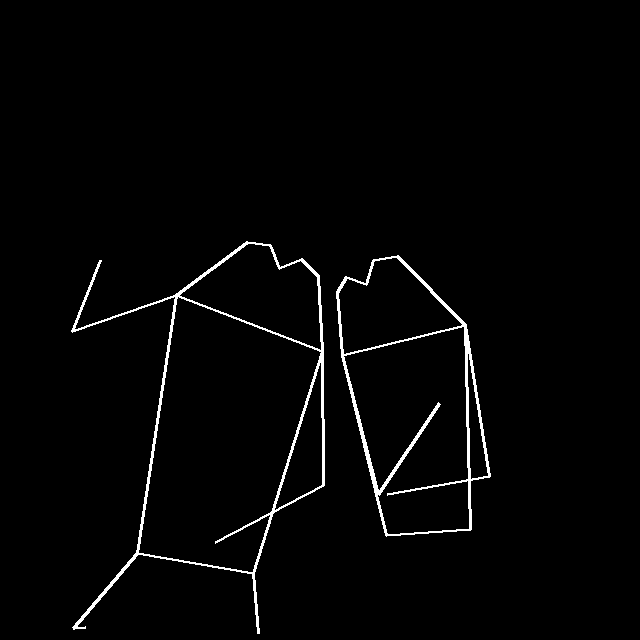

In [11]:
def toTuple(np_array):
    return tuple([tuple(e) for e in np_array])

def draw_head(d_img, result, conf, width):
    if result[4][2] > conf:
        point = [result[6][:-1].tolist(), result[4][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[2][2] > conf:
        point = [result[4][:-1].tolist(), result[2][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[0][2] > conf:
        point = [result[2][:-1].tolist(), result[0][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[1][2] > conf:
        point = [result[0][:-1].tolist(), result[1][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[3][2] > conf:
        point = [result[1][:-1].tolist(), result[3][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[5][2] > conf:
        point = [result[3][:-1].tolist(), result[5][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_right_hand(d_img, result, conf, width):
    if result[8][2] > conf:
        point = [result[6][:-1].tolist(), result[8][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[10][2] > conf:
        point = [result[8][:-1].tolist(), result[10][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_left_hand(d_img, result, conf, width):
    if result[7][2] > conf:
        point = [result[5][:-1].tolist(), result[7][:-1].tolist()]
        d_img.line(toTuple(point), width = width) 
    if result[9][2] > conf:
        point = [result[7][:-1].tolist(), result[9][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_body(d_img, result, conf, width):
    if result[5][2] > conf:
        point = [result[6][:-1].tolist(), result[5][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[11][2] > conf:
        point = [result[5][:-1].tolist(), result[11][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[12][2] > conf:
        point = [result[11][:-1].tolist(), result[12][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[6][2] > conf:
        point = [result[12][:-1].tolist(), result[6][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_right_leg(d_img, result, conf, width):
    if result[14][2] > conf:
        point = [result[12][:-1].tolist(), result[14][:-1].tolist()]
        d_img.line(toTuple(point), width = width) 
    if result[14][2] > conf:
        point = [result[14][:-1].tolist(), result[16][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_left_leg(d_img, result, conf, width):
    if result[13][2] > conf:
        point = [result[11][:-1].tolist(), result[13][:-1].tolist()]
        d_img.line(toTuple(point), width = width)
    if result[15][2] > conf:
        point = [result[13][:-1].tolist(), result[15][:-1].tolist()]
        d_img.line(toTuple(point), width = width)

def draw_img(size:tuple, pred:list, conf:float, width):
    img = Image.new("RGB", size)  
    d_img = ImageDraw.Draw(img)
    for result in pred:
        result = result[7:].reshape(17, -1)
        draw_head(d_img, result, conf, width)
        draw_right_hand(d_img, result, conf, width)
        draw_left_hand(d_img, result, conf, width)
        draw_body(d_img, result, conf, width)
        draw_right_leg(d_img, result, conf, width)
        draw_left_leg(d_img, result, conf, width)
    return img.convert("L")

skeleton = draw_img((img.shape[1], img.shape[0]), pred, 0.2, 3)
skeleton

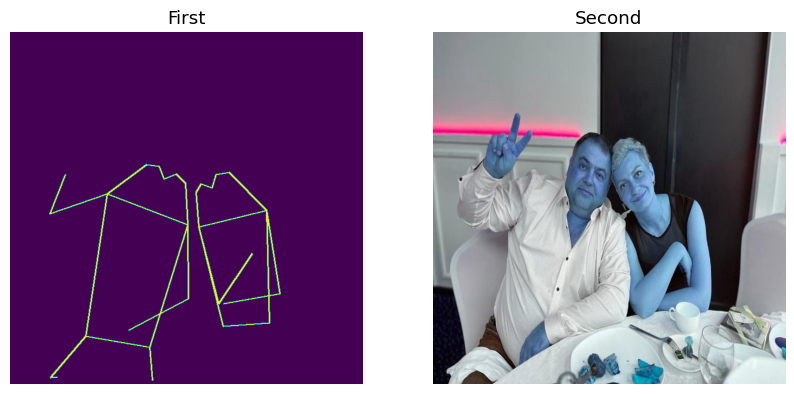

<Figure size 640x480 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(10, 10))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(skeleton)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)
%matplotlib inline
plt.imshow(img)
plt.axis('off')
plt.title("Second")
plt.show()

plt.savefig("x.png")